In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
retail = pd.read_csv(r"C:\Users\hrap003\Desktop\Python\Data science projects\Retail pojects\UK retail data\data.csv", encoding = "Latin-1")

In [3]:
"""
1. Show the size of the dataframe
2. Total number of rows
3. Total number of columns
"""

retail.shape

(541909, 8)

In [4]:
"""
Information about the dataframe
"""
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
"""
1. Renaming the column names
2. Used mapping dictonary technique to rename all the columns together
"""

retail = retail.rename(columns={    
    "InvoiceNo": "invoice_no",
    "StockCode": "stock_code",
    "Description": "description",
    "Quantity": "quantity",
    "InvoiceDate": "invoice_date",
    "UnitPrice": "unit_price",
    "CustomerID": "customer_id",
    "Country": "country"})

In [6]:
"""
Show renamed column names
"""
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
invoice_no      541909 non-null object
stock_code      541909 non-null object
description     540455 non-null object
quantity        541909 non-null int64
invoice_date    541909 non-null object
unit_price      541909 non-null float64
customer_id     406829 non-null float64
country         541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
"""
For analysis purpose filtering data and choosing one country which is United Kingdom
"""
retail = retail[retail["country"]== "United Kingdom"]

In [8]:
"""
Show the size of the dataframe after choosing the dataset for United Kingdom
"""

retail.shape

(495478, 8)

In [9]:
"""
1. Changing the country column data/values
2. Used the mapping dictonary techique to map the data/values
"""

column = ["country"]
convert_country_abbr = {"United Kingdom": "UK"}

for col in column:
    retail[col] = retail[col].map(convert_country_abbr)

In [10]:
"""
Checking the total number of null values for each column
"""

retail.isnull().sum(axis=0)

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     133600
country              0
dtype: int64

In [11]:
"""
1. Remove all the rows with null values
2. Perform analysis only on customers with non nulls
3. The below code will drop all the rows with nulls
"""

retail = retail.dropna()

In [12]:
"""
1. Show the size of the dataframe after dropping null rows
2. Total number of rows
3. Total number of columns
"""

retail.shape

(361878, 8)

In [13]:
"""
Check the total number of duplicate rows in the dataset
"""

retail.duplicated().sum()

5150

In [14]:
"""
1. The code below removes all the duplicate rows from the dataset
2. Keeps the first instance/row and removes the rest of the duplicated rows/instances
"""

retail = retail.drop_duplicates(keep="first")

In [15]:
"""
1. Show the size of the dataframe after removing duplicates from the dataset
2. Total number of rows
3. Total number of columns
"""

retail.shape

(356728, 8)

In [16]:
"""
1. Convert customer_id data type from float to Integer
2. Looking at the dataset it is safe to convert to Integer for analysis  purpose
"""

retail["customer_id"] = retail["customer_id"].astype(int)

In [17]:
"""
Show the total number of notnulls for each column
"""

retail.notnull().sum(axis=0)

invoice_no      356728
stock_code      356728
description     356728
quantity        356728
invoice_date    356728
unit_price      356728
customer_id     356728
country         356728
dtype: int64

In [18]:
"""
Show the total number of nulls for each column after all the clean ups
"""

retail.isnull().sum(axis=0)

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [19]:
"""
Check the quantities for every row
If the quantity is zero or below, remove from the dataset
Perform analysis only on the dataset with quantities greater than zero
"""

retail[retail["quantity"] <= 0].shape

(7501, 8)

In [20]:
"""
Check the quantites for every row
If the quantity is above zero, keep those rows
"""

retail[retail["quantity"] > 0].shape

(349227, 8)

In [21]:
"""
Filter the dataset further to pick only the rows with quantities greater than zero
"""

retail = retail[retail["quantity"] > 0]

In [22]:
"""
Check the size of dataset after filteration
"""

retail.shape

(349227, 8)

In [23]:
"""
Check the unit_price for every row
If the unit price is zero or below, remove the rows from the dataset
"""

retail[retail["unit_price"] <= 0].shape

(24, 8)

In [24]:
"""
Check the unit price for every row above zero unit price
"""

retail[retail["unit_price"] > 0].shape

(349203, 8)

In [25]:
"""
Filter the dataset further to pick only the rows with unit price greater than zero
"""

retail = retail[retail["unit_price"] > 0]

In [26]:
"""
Check the size of the dataset after filtering
"""

retail.shape

(349203, 8)

In [27]:
"""
Convert invoice date column from string to datetime object
and create a new column for month
"""

retail['invoice_month'] = pd.to_datetime(retail["invoice_date"]).dt.to_period('M')

In [28]:
"""
Checking the unique/distinct number of customers
"""
retail["customer_id"].nunique()

3920

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'fals

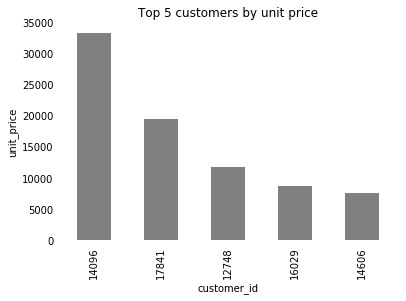

,unit_price
customer_id,
14096,33332.45
17841,19471.68
12748,11788.31
16029,8720.65
14606,7535.19


In [29]:
"""
1. Analyse the customers who purchased the most by unit price
2. Show top 5 coustomers based on the purchases by unit price
3. Create a plot to show "Top 5 Customers by purchases by unit price"
"""

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = retail.groupby("customer_id")["unit_price"].sum().sort_values(ascending=False).head().plot.bar(color="grey")
ax.set_xlabel("customer_id")
ax.set_ylabel("unit_price")
ax.set_title("Top 5 customers by unit price")
ax.tick_params(bottom="off", top="off", left="off", right="off")

for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.show()
pd.DataFrame(retail.groupby("customer_id")["unit_price"].sum().sort_values(ascending=False).head())

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'fals

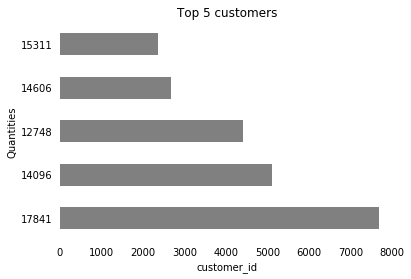

,customer_id
17841,7676
14096,5111
12748,4412
14606,2677
15311,2366


In [30]:
"""
1. Show the total number of times a customer purchased
2. Show top 5 customers who shopped the most
3. Create a plot to show "Top 5 customers who shopped the most"
"""

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = retail["customer_id"].value_counts().sort_values(ascending=False).head().plot.barh(color="grey")
ax.set_xlabel("customer_id")
ax.set_ylabel("Quantities")
ax.set_title("Top 5 customers")
ax.tick_params(bottom="off", top="off", left="off", right="off")

for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.show()
pd.DataFrame(retail["customer_id"].value_counts().sort_values(ascending=False).head())

In [31]:
"""
Check the total number of unique products by descriptions
"""

retail["description"].nunique()

3844

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'fals

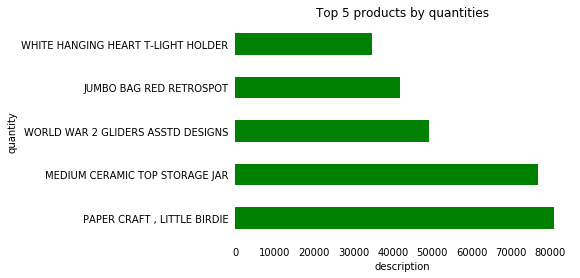

,quantity
description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086
JUMBO BAG RED RETROSPOT,41878
WHITE HANGING HEART T-LIGHT HOLDER,34630


In [32]:
"""
Show the most products sold by quantities
Show the top 5 products purchased by quantities
Create a plot show "Top 5 products sold by quantities"
"""

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = retail.groupby("description")["quantity"].sum().sort_values(ascending=False).head().plot.barh(color = "green")
ax.set_xlabel("description")
ax.set_ylabel("quantity")
ax.set_title("Top 5 products by quantities")
ax.tick_params(bottom="off", top="off", left="off", right="off")

for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.show()
pd.DataFrame(retail.groupby("description")["quantity"].sum().sort_values(ascending=False).head())

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'fals

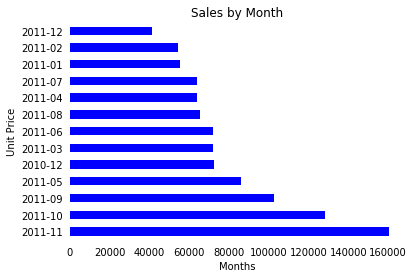

In [33]:
"""
Create a plot to show "Sales by Month"
"""


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

months = retail['invoice_month'].sort_values()
start_month = months.iloc[0]
end_month = months.iloc[-1]

index = pd.PeriodIndex(start=start_month, end=end_month)
ax = retail.groupby('invoice_month')['unit_price'].sum().reindex(index).sort_values(ascending=False).plot.barh(color = "blue")

ax.set_xlabel("Months")
ax.set_ylabel("Unit Price")
ax.set_title("Sales by Month")
ax.tick_params(bottom="off", top="off", left="off", right="off")

for key,spine in ax.spines.items():
        spine.set_visible(False)

plt.show()

In [37]:
month_description = retail[["invoice_month", "description"]]

In [41]:
month_description["invoice_month"].unique()

array([Period('2010-12', 'M'), Period('2011-01', 'M'),
       Period('2011-02', 'M'), Period('2011-03', 'M'),
       Period('2011-04', 'M'), Period('2011-05', 'M'),
       Period('2011-06', 'M'), Period('2011-07', 'M'),
       Period('2011-08', 'M'), Period('2011-09', 'M'),
       Period('2011-10', 'M'), Period('2011-11', 'M'),
       Period('2011-12', 'M')], dtype=object)

In [42]:
month_description["invoice_month"] = month_description["invoice_month"].astype(str)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
month_description["invoice_month"].unique()

array(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'], dtype=object)

In [44]:
month = month_description["invoice_month"].unique()
month = list(month)

In [51]:
s = month_description["description"].groupby(month_description["invoice_month"]).value_counts()

In [69]:
a = pd.DataFrame(s.groupby(level=[0]).nlargest(5))

In [70]:
a.columns

Index(['description'], dtype='object')

In [76]:
a.reset_index(level=["invoice_month", "description"])

KeyError: 'Level invoice_month not found'

In [80]:
a.rename({"description":"Count"}, axis = 1, inplace=True)

In [81]:
a.columns

Index(['Count'], dtype='object')

In [85]:
a.head()

Count
invoice_month invoice_month description                              
2010-12       2010-12       WHITE HANGING HEART T-LIGHT HOLDER    202
                            HAND WARMER BABUSHKA DESIGN           134
                            PAPER CHAIN KIT 50'S CHRISTMAS        133
                            SCOTTIE DOG HOT WATER BOTTLE          128
                            REGENCY CAKESTAND 3 TIER              123

In [90]:
a.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 65 entries, (2010-12, 2010-12, WHITE HANGING HEART T-LIGHT HOLDER) to (2011-12, 2011-12, HAND WARMER OWL DESIGN)
Data columns (total 1 columns):
Count    65 non-null int64
dtypes: int64(1)
memory usage: 2.0+ KB


In [ ]:
a.rename